## Create RFM dataset

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler  <--  this is to normalize data before applying Kmeans
from sklearn.cluster import KMeans

In [2]:
# Import clean_data
customer_data = pd.read_excel(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\clean_data.xlsx')
customer_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085,United Kingdom


In [3]:
customer_data.shape

(800909, 8)

In [4]:
# In order to calculate the monetary value for each customer we first need to create 'TotalValue' column
customer_data["TotalValue"] = customer_data["Quantity"] * customer_data["Price"]

In [5]:
# In order to calculate the recency value we need to find out which was the last transaction date
last_transaction_date = customer_data["InvoiceDate"].max()
print(last_transaction_date)

2011-12-09 00:00:00


In [6]:
# Set date 12/10/20211, which is one day after the last transaction date, as today_date
today_date = dt.datetime(2011,12,10)

In [7]:
# Group by Customer ID and calculate RFM values
rfm = customer_data.groupby(["Customer ID"], as_index=False).agg(
                            {"InvoiceDate": lambda x :(today_date-x.max()).days,
                               "Invoice": lambda x : x.count(),
                               "TotalValue":lambda x : x.sum()})

In [8]:
# Rename columns accordingly
rfm.columns = ["Customer ID", "Recency", "Frequency", "Monetary"]
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,432,34,368.36
1,12347,3,222,4921.53
2,12348,76,51,2019.40
3,12349,19,179,4419.49
4,12350,311,17,334.40


In [9]:
rfm["Recency"] = rfm["Recency"].astype(float)
rfm["Frequency"] = rfm["Frequency"].astype(float)
rfm["Monetary"] = rfm["Monetary"].astype(float).round(2)

In [10]:
rfm.shape

(5848, 4)

In [11]:
rfm_values = rfm.to_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_values.csv', index=False)

### Create RFM score using *qcut()* function

In [12]:
# Calculate RFM scores
# Using pd.qcut() categorize each customer into 5 bins based on their value in each one of the metrics R,F,M
rfm["Recency_Score"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["Frequency_Score"]= pd.qcut(rfm["Frequency"], 5, labels = [1, 2, 3, 4, 5])
rfm["Monetary_Score"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12346,432.0,34.0,368.36,1,2,2
1,12347,3.0,222.0,4921.53,5,5,5
2,12348,76.0,51.0,2019.40,3,3,4
3,12349,19.0,179.0,4419.49,5,4,5
4,12350,311.0,17.0,334.40,2,1,2


In [13]:
rfm["RFM_Score"] = rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str) + rfm["Monetary_Score"].astype(str)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,432.0,34.0,368.36,1,2,2,122
1,12347,3.0,222.0,4921.53,5,5,5,555
2,12348,76.0,51.0,2019.40,3,3,4,334
3,12349,19.0,179.0,4419.49,5,4,5,545
4,12350,311.0,17.0,334.40,2,1,2,212


In [14]:
rfmdata = rfm.to_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_data_ipynb.csv', index=False)

### Create RFM scores using *K-means* algorithm

In [15]:
# The code below is kmeans Python code for Power BI.
# We can run it in Power BI and in Jupyter and come up with the scores individually.
# If the process was deterministic, i.e. if the k centers of the k clusters were not 
# initialised randomly, then there would be no problem, since the same code would produce
# the same results in each tool. But the clusters are indeed initialised randomly.
# ...
# We could try to run this code at each tool and try to "sync" their results, but this would take time. 
# Instead we will produce the results here (they may as well had been produced in Power BI),
# and feed the produced dataset to Power BI, as if *it* had produced them, which is perfectly capable of,
# and which we would, if only for the randomness inherent to kmeans.
#
# The other problem is that since the process is random: which is the correct clustering?
# Run if for N times and take that which is the most frequent.

In [16]:
def my_iterative_kmeans(rfm, rfm_column_name, num_runs, n_clusters):
        
    uids = []
    rfms = []
    
    # python produces 0:4 labels, we want 1:5
    labels_mapping = {0:1, 1:2, 2:3, 3:4, 4:5}
    
    for i in range(num_runs):
        # The following two lines are the essence of Kmeans
        # After appropriate renamings these two lines constitute the code that should run in Power BI
        kmeans = KMeans(n_clusters=n_clusters).fit(rfm[[rfm_column_name]])
        rfm[rfm_column_name+'_clustered'] = kmeans.labels_
        
        # https://stackoverflow.com/questions/44888415/how-to-set-k-means-clustering-labels-from-highest-to-lowest-with-python
        idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
        lut = np.zeros_like(idx)
        lut[idx] = np.arange(n_clusters)
        
        # Map from 0-4 to 1-5
        lut[kmeans.labels_] = [labels_mapping[i] for i in lut[kmeans.labels_]]
        rfm[rfm_column_name+'_clustered'] = [labels_mapping[i] for i in rfm[rfm_column_name+'_clustered']]

        uid = [sum(lut[kmeans.labels_] == 1), 
               sum(lut[kmeans.labels_] == 2), 
               sum(lut[kmeans.labels_] == 3), 
               sum(lut[kmeans.labels_] == 4), 
               sum(lut[kmeans.labels_] == 5)],
              
        uids.append(''.join(str(uid)))
        rfms.append(rfm)
        
    return uids,rfms

In [17]:
# Run 5-means ntimes for each column

ntimes = 10
nclusters = 5

mik_r = my_iterative_kmeans(rfm, 'Recency',   ntimes, nclusters)
mik_f = my_iterative_kmeans(rfm, 'Frequency', ntimes, nclusters)
mik_m = my_iterative_kmeans(rfm, 'Monetary',  ntimes, nclusters)

# counts
counts_r = {}
counts_f = {}
counts_m = {}

for i in mik_r[0]:
  counts_r[i] = (counts_r[i] + 1) if (i in counts_r) else 1
for i in mik_f[0]:
  counts_f[i] = (counts_f[i] + 1) if (i in counts_f) else 1
for i in mik_m[0]:
  counts_m[i] = (counts_m[i] + 1) if (i in counts_m) else 1

In [18]:
[counts_r, counts_f, counts_m]

[{'([2874, 758, 587, 1029, 600],)': 4,
  '([2856, 757, 606, 1029, 600],)': 2,
  '([2864, 763, 592, 1029, 600],)': 1,
  '([2627, 901, 691, 1029, 600],)': 1,
  '([2824, 776, 619, 1028, 601],)': 2},
 {'([4873, 833, 132, 8, 2],)': 3,
  '([4870, 836, 132, 8, 2],)': 2,
  '([4879, 827, 132, 8, 2],)': 1,
  '([4867, 838, 133, 8, 2],)': 3,
  '([4870, 835, 133, 8, 2],)': 1},
 {'([5528, 287, 26, 5, 2],)': 1,
  '([5486, 328, 27, 5, 2],)': 2,
  '([5480, 333, 28, 5, 2],)': 5,
  '([5493, 321, 27, 5, 2],)': 1,
  '([5504, 310, 27, 5, 2],)': 1}]

In [19]:
# find uid with max counts
# max(counts_r, key=counts_r.get)
# This gives the string located in `uids` that is most frequent
# https://stackoverflow.com/a/280156

# We want to obtain one such clustering that is stored in the mik_*[1] element of the `my_iterative_kmeans` return object.
# These are the rid, fid, and mids
# https://stackoverflow.com/a/176921
rid = mik_r[0].index(max(counts_r, key=counts_r.get))
fid = mik_f[0].index(max(counts_f, key=counts_f.get))
mid = mik_m[0].index(max(counts_m, key=counts_m.get))

# These clusterings are saved here:
# mik_r[1][rid]
# mik_f[1][fid]
# mik_m[1][mid]

In [20]:
rfm2 = rfm[["Customer ID", "Recency_Score", "Frequency_Score", "Monetary_Score"]]
rfm2.head(5)

,Customer ID,Recency_Score,Frequency_Score,Monetary_Score
0,12346,1,2,2
1,12347,5,5,5
2,12348,3,3,4
3,12349,5,4,5
4,12350,2,1,2


In [46]:
rfm2 = rfm[["Customer ID", "Recency", "Frequency", "Monetary", "Recency_clustered", "Frequency_clustered", "Monetary_clustered"]]
rfm2.head(5)

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered
0,12346,432.0,34.0,368.36,4,1,1
1,12347,3.0,222.0,4921.53,3,4,1
2,12348,76.0,51.0,2019.40,3,1,1
3,12349,19.0,179.0,4419.49,3,1,1
4,12350,311.0,17.0,334.40,5,1,1


## Make scores ascending in order

In [102]:
# The problem as you can see in the three sections below is that the maximum score does not correspond to the highest
# quantile percent, e.g. Monetary label 5 does not correspond to the maximum cluster of monetary values. What we have to do
# is make the ordering ascending for all three variables. 

In [103]:
r1 = rfm2.groupby(["Recency_clustered"], as_index=False).agg(
                            {"Recency": lambda x :x.mean()})
r1.head()

,Recency_clustered,Recency
0,1,137.671392
1,2,625.690516
2,3,30.082861
3,4,422.585603
4,5,265.730210


In [104]:
r2 = rfm2.groupby(["Frequency_clustered"], as_index=False).agg(
                            {"Frequency": lambda x :x.mean()})
r2.head()

,Frequency_clustered,Frequency
0,1,57.503390
1,2,4722.125000
2,3,1142.849624
3,4,366.371122
4,5,12122.500000


In [105]:
r3 = rfm2.groupby(["Monetary_clustered"], as_index=False).agg(
                            {"Monetary": lambda x :x.mean()})
r3.head()

,Monetary_clustered,Monetary
0,1,1376.504703
1,2,231977.796000
2,3,551473.690000
3,4,14443.458872
4,5,75638.912593


## Correct scores

# MAKE SURE TO REPEATEDLY RUN THE THREE CELLS BELOW UNTIL THEY ARE CORRECT

In [108]:
r1_map = r1["Recency"].argsort()+1
r1_map = r1_map*10

for i in range(len(r1_map)):
    r1['Recency_clustered'].replace(i+1, r1_map[i], inplace=True)

for j in range(len(r1_map)):
    r1['Recency_clustered'].replace(10*(j+1),j+1, inplace=True)
    

# observe correct mapping    
r1.head()

,Recency_clustered,Recency
0,2,137.671392
1,5,625.690516
2,1,30.082861
3,4,422.585603
4,3,265.730210


In [109]:
r2_map = r2["Frequency"].argsort()+1
r2_map = r2_map*10

for i in range(len(r2_map)):
    r2['Frequency_clustered'].replace(i+1, r2_map[i], inplace=True)

    
for j in range(len(r2_map)):
    r2['Frequency_clustered'].replace(10*(j+1),j+1, inplace=True)


# observe correct mapping    
r2.head()

,Frequency_clustered,Frequency
0,1,57.503390
1,4,4722.125000
2,3,1142.849624
3,2,366.371122
4,5,12122.500000


In [112]:
r3_map = r3["Monetary"].argsort()+1
r3_map = r3_map*10
    
for i in range(len(r3_map)):
    r3['Monetary_clustered'].replace(i+1, r3_map[i], inplace=True)

    
for j in range(len(r3_map)):
    r3['Monetary_clustered'].replace(10*(j+1),j+1, inplace=True)

# observe correct mapping    
r3.head()

,Monetary_clustered,Monetary
0,1,1376.504703
1,4,231977.796000
2,5,551473.690000
3,2,14443.458872
4,3,75638.912593


In [113]:
rfm2.head()

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered
0,12346,432.0,34.0,368.36,4,1,1
1,12347,3.0,222.0,4921.53,3,4,1
2,12348,76.0,51.0,2019.40,3,1,1
3,12349,19.0,179.0,4419.49,3,1,1
4,12350,311.0,17.0,334.40,5,1,1


In [114]:
print("%d,%d,%d" % (rfm2["Recency_clustered"].nunique(),rfm2["Frequency_clustered"].nunique(),rfm2["Monetary_clustered"].nunique()))

5,5,5


In [115]:
rfm3 = rfm2.copy()
for i in range(len(r3_map)):
    rfm3['Recency_clustered'].replace(i+1,   10*r1["Recency_clustered"][i],   inplace=True)
    rfm3['Frequency_clustered'].replace(i+1, 10*r2["Frequency_clustered"][i], inplace=True)
    rfm3['Monetary_clustered'].replace(i+1,  10*r3["Monetary_clustered"][i],  inplace=True)

In [116]:
for i in range(len(r3_map)):
    rfm3['Recency_clustered'].replace(10*(i+1),   r1["Recency_clustered"][i],   inplace=True)
    rfm3['Frequency_clustered'].replace(10*(i+1), r2["Frequency_clustered"][i], inplace=True)
    rfm3['Monetary_clustered'].replace(10*(i+1),  r3["Monetary_clustered"][i],  inplace=True)

In [117]:
rfm3.head()

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered
0,12346,432.0,34.0,368.36,4,1,1
1,12347,3.0,222.0,4921.53,2,4,1
2,12348,76.0,51.0,2019.40,2,1,1
3,12349,19.0,179.0,4419.49,2,1,1
4,12350,311.0,17.0,334.40,1,1,1


In [118]:
rfmdata_clustered = rfm3.to_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_scores_via_kmeans.csv', index=False)

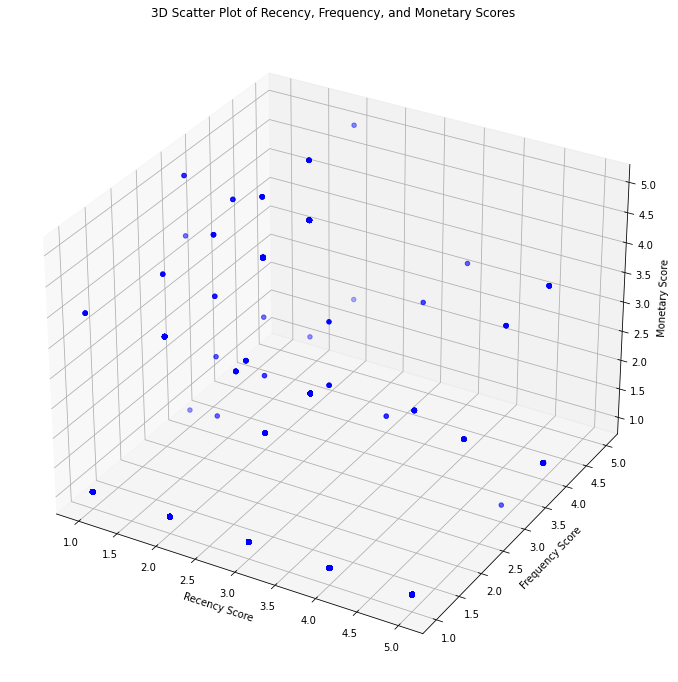

In [119]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(rfm3['Recency_clustered'], rfm3['Frequency_clustered'], rfm3['Monetary_clustered'], c='b', marker='o')

# Set labels
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')

# Set title
ax.set_title('3D Scatter Plot of Recency, Frequency, and Monetary Scores')

plt.show()